<a href="https://colab.research.google.com/github/badgiojuni/DL_with_pytorch/blob/main/playing_with_PYTORCH_and_Mnist_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DL with PYTORCH MODULE 1/6 (JOVIAN)**

In [1]:
#import jovian

In [2]:
import torch

In [3]:
t1 = torch.tensor(4.)

In [4]:
t1

tensor(4.)

In [5]:
t1.shape

torch.Size([])

In [6]:
t2 = torch.tensor([[[4.0, 32, 3,1]]])
t2.shape

torch.Size([1, 1, 4])

In [7]:
t3 = torch.tensor([[[1,2,3], [4,5,6]],[[7,8,9],[9,10,12]]])
t3.shape

torch.Size([2, 2, 3])

In [8]:
t3

tensor([[[ 1,  2,  3],
         [ 4,  5,  6]],

        [[ 7,  8,  9],
         [ 9, 10, 12]]])

In [9]:
t1 = torch.tensor(3.)
t2 = torch.tensor(4., requires_grad=True)
t3 = torch.tensor(5., requires_grad=True)

In [10]:
y = t1*t2 + t3
y.backward()

In [11]:
print(t3.grad)

tensor(1.)


In [12]:
import numpy as np
x = np.array([[1,2,3], [4.,5,6]])
x.dtype

dtype('float64')

In [13]:
y = torch.from_numpy(x)
y.dtype
z = y.numpy()
z

array([[1., 2., 3.],
       [4., 5., 6.]])

**Linear regression with pytorch**

In [14]:
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70]], dtype='float32')
targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119]], dtype='float32')

In [15]:
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

In [16]:
w = torch.randn((2,3), requires_grad=True)
b = torch.randn(2, requires_grad=True)

In [17]:
def model(x):
   y = x @ w.t() + b
   return y

In [18]:
preds = model(inputs)

In [19]:
print(preds) 
print(targets)

tensor([[-36.3128,  55.2086],
        [-51.7077,  72.8876],
        [-45.8121, 111.2011],
        [-37.9526,  33.2757],
        [-51.7035,  81.0793]], grad_fn=<AddBackward0>)
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


In [20]:
diff = preds - targets
diff = diff**2
diff = torch.sum(diff)/ diff.numel()
diff

tensor(8375.9629, grad_fn=<DivBackward0>)

In [21]:
def mse(t1,t2):
  return torch.sum((t1 - t2)**2) / t1.numel()

In [22]:
loss = mse(targets, preds)
loss.backward()


In [23]:
print(w.grad)

tensor([[ -9988.7197, -11475.5107,  -7013.8682],
        [ -1706.1830,  -2037.3004,  -1298.3619]])


In [24]:
 w.grad.zero_()
 

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [25]:
# step1 : prediction
preds = model(inputs)
print(preds)

tensor([[-36.3128,  55.2086],
        [-51.7077,  72.8876],
        [-45.8121, 111.2011],
        [-37.9526,  33.2757],
        [-51.7035,  81.0793]], grad_fn=<AddBackward0>)


In [26]:
# step2 : loss calculation
loss = mse(preds,targets)
print(loss)

tensor(8375.9629, grad_fn=<DivBackward0>)


In [27]:
# compute gradient of loss
loss.backward() 
print(w.grad)
print(b.grad)

tensor([[ -9988.7197, -11475.5107,  -7013.8682],
        [ -1706.1830,  -2037.3004,  -1298.3619]])
tensor([-241.7955,  -42.5391])


In [28]:
#adjust the weight by reset gradient
with torch.no_grad():
   w -= w.grad * 1e-5
   b -= b.grad * 1e-5
   w.grad.zero_()
   b.grad.zero_()

In [29]:
print(w)
print(b)

tensor([[-0.0599,  0.1471, -0.5583],
        [-0.0371,  0.8555,  0.0661]], requires_grad=True)
tensor([0.2140, 0.9241], requires_grad=True)


In [30]:
preds = model(inputs)
print(preds)
print(mse(preds,targets))

tensor([[-18.3140,  58.3778],
        [-28.0283,  77.0644],
        [-17.6742, 116.1689],
        [-20.2321,  36.3728],
        [-28.8827,  85.1217]], grad_fn=<AddBackward0>)
tensor(5740.5586, grad_fn=<DivBackward0>)


In [31]:
nb_epochs=100
for i in range(nb_epochs):
  preds = model(inputs)
  loss = mse(preds,targets)
  print(loss)
  loss.backward()
  with torch.no_grad():
   w -= w.grad * 1e-5
   b -= b.grad * 1e-5
   w.grad.zero_()
   b.grad.zero_()

tensor(5740.5586, grad_fn=<DivBackward0>)
tensor(3963.7722, grad_fn=<DivBackward0>)
tensor(2765.4829, grad_fn=<DivBackward0>)
tensor(1957.0476, grad_fn=<DivBackward0>)
tensor(1411.3397, grad_fn=<DivBackward0>)
tensor(1042.6910, grad_fn=<DivBackward0>)
tensor(793.3709, grad_fn=<DivBackward0>)
tensor(624.4756, grad_fn=<DivBackward0>)
tensor(509.7879, grad_fn=<DivBackward0>)
tensor(431.6406, grad_fn=<DivBackward0>)
tensor(378.1275, grad_fn=<DivBackward0>)
tensor(341.2256, grad_fn=<DivBackward0>)
tensor(315.5276, grad_fn=<DivBackward0>)
tensor(297.3900, grad_fn=<DivBackward0>)
tensor(284.3569, grad_fn=<DivBackward0>)
tensor(274.7735, grad_fn=<DivBackward0>)
tensor(267.5245, grad_fn=<DivBackward0>)
tensor(261.8579, grad_fn=<DivBackward0>)
tensor(257.2673, grad_fn=<DivBackward0>)
tensor(253.4109, grad_fn=<DivBackward0>)
tensor(250.0586, grad_fn=<DivBackward0>)
tensor(247.0549, grad_fn=<DivBackward0>)
tensor(244.2950, grad_fn=<DivBackward0>)
tensor(241.7084, grad_fn=<DivBackward0>)
tensor(239

In [32]:
import torch.nn as nn

In [33]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70], 
                   [74, 66, 43], 
                   [91, 87, 65], 
                   [88, 134, 59], 
                   [101, 44, 37], 
                   [68, 96, 71], 
                   [73, 66, 44], 
                   [92, 87, 64], 
                   [87, 135, 57], 
                   [103, 43, 36], 
                   [68, 97, 70]], 
                  dtype='float32')

# Targets (apples, oranges)
targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119],
                    [57, 69], 
                    [80, 102], 
                    [118, 132], 
                    [21, 38], 
                    [104, 118], 
                    [57, 69], 
                    [82, 100], 
                    [118, 134], 
                    [20, 38], 
                    [102, 120]], 
                   dtype='float32')

inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

In [34]:
from torch.utils.data import TensorDataset

In [35]:
train_ds = TensorDataset(inputs, targets)
train_ds[0:2]

(tensor([[73., 67., 43.],
         [91., 88., 64.]]), tensor([[ 56.,  70.],
         [ 81., 101.]]))

In [36]:
from torch.utils.data import DataLoader
batch_size = 5
train_dl = DataLoader(dataset=train_ds, batch_size=batch_size, shuffle=False, drop_last=False)


In [37]:
for xb, xl in train_dl:
  print(xb)
  print(xl)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])
tensor([[ 74.,  66.,  43.],
        [ 91.,  87.,  65.],
        [ 88., 134.,  59.],
        [101.,  44.,  37.],
        [ 68.,  96.,  71.]])
tensor([[ 57.,  69.],
        [ 80., 102.],
        [118., 132.],
        [ 21.,  38.],
        [104., 118.]])
tensor([[ 73.,  66.,  44.],
        [ 92.,  87.,  64.],
        [ 87., 135.,  57.],
        [103.,  43.,  36.],
        [ 68.,  97.,  70.]])
tensor([[ 57.,  69.],
        [ 82., 100.],
        [118., 134.],
        [ 20.,  38.],
        [102., 120.]])


In [38]:
model = nn.Linear(3,2)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[ 0.4485, -0.2900,  0.0429],
        [-0.4654, -0.4155, -0.1453]], requires_grad=True)
Parameter containing:
tensor([-0.2744, -0.2423], requires_grad=True)


In [39]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.4485, -0.2900,  0.0429],
         [-0.4654, -0.4155, -0.1453]], requires_grad=True),
 Parameter containing:
 tensor([-0.2744, -0.2423], requires_grad=True)]

In [40]:
preds = model(inputs)
print(preds)

tensor([[  14.8808,  -68.3071],
        [  17.7649,  -88.4622],
        [   2.3746, -104.8414],
        [  34.5885,  -70.9612],
        [   5.8361,  -82.4182],
        [  15.6192,  -68.3570],
        [  18.0977,  -88.1921],
        [   2.8659, -105.4521],
        [  33.8500,  -70.9113],
        [   5.4305,  -82.0981],
        [  15.2137,  -68.0369],
        [  18.5033,  -88.5122],
        [   2.0417, -105.1115],
        [  34.9940,  -71.2814],
        [   5.0977,  -82.3683]], grad_fn=<AddmmBackward0>)


In [41]:
import torch.nn.functional as F
loss_fctn = F.mse_loss

In [43]:
loss = loss_fctn(preds, targets)
print(loss)

tensor(19264.6270, grad_fn=<MseLossBackward0>)


In [44]:
# optimization
opt = torch.optim.SGD(model.parameters(), lr=1e-5)

In [47]:
def fit(num_epochs, model, loss_fn, opt, train_dl):
  for epoch in range(num_epochs):

    for xb, xl in train_dl:
      # compute the ouptut of the model
      preds = model(xb)
      # calculate the current loss with respect to the target
      loss = loss_fn(preds, xl)
      # compute the gradient
      loss.backward()
      # update parameters using gradient
      opt.step()
      # reset the gradients to zero
      opt.zero_grad()

      if (epoch+1) % 10 ==0:
        print(loss) 


In [48]:
fit(100, model, loss_fctn, opt, train_dl)

tensor(602.4345, grad_fn=<MseLossBackward0>)
tensor(588.1064, grad_fn=<MseLossBackward0>)
tensor(601.1856, grad_fn=<MseLossBackward0>)
tensor(414.6712, grad_fn=<MseLossBackward0>)
tensor(407.3503, grad_fn=<MseLossBackward0>)
tensor(410.9660, grad_fn=<MseLossBackward0>)
tensor(286.8992, grad_fn=<MseLossBackward0>)
tensor(283.7033, grad_fn=<MseLossBackward0>)
tensor(281.8694, grad_fn=<MseLossBackward0>)
tensor(199.6170, grad_fn=<MseLossBackward0>)
tensor(199.0233, grad_fn=<MseLossBackward0>)
tensor(194.0826, grad_fn=<MseLossBackward0>)
tensor(139.9243, grad_fn=<MseLossBackward0>)
tensor(140.9328, grad_fn=<MseLossBackward0>)
tensor(134.3746, grad_fn=<MseLossBackward0>)
tensor(99.0361, grad_fn=<MseLossBackward0>)
tensor(100.9955, grad_fn=<MseLossBackward0>)
tensor(93.7482, grad_fn=<MseLossBackward0>)
tensor(70.9696, grad_fn=<MseLossBackward0>)
tensor(73.4601, grad_fn=<MseLossBackward0>)
tensor(66.0850, grad_fn=<MseLossBackward0>)
tensor(51.6496, grad_fn=<MseLossBackward0>)
tensor(54.4047, 

**DL WITH PYTORCH SESSION 2**

In [1]:
import torch, torchvision
from torchvision.datasets import MNIST

In [2]:
dataset = MNIST(root="data/", download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [3]:
type(dataset)

torchvision.datasets.mnist.MNIST

In [4]:
test_dataset = MNIST(root='data/', train=False)

In [5]:
len(test_dataset)

10000

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 5


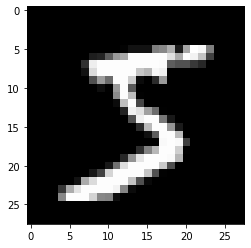

In [7]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print("Label:", label)

In [8]:
import torchvision.transforms as transforms

In [9]:
dataset = MNIST(root='/data', download=True, train=True, transform= transforms.ToTensor())

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /data/MNIST/raw/train-images-idx3-ubyte.gz to /data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /data/MNIST/raw/train-labels-idx1-ubyte.gz to /data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /data/MNIST/raw/t10k-images-idx3-ubyte.gz to /data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /data/MNIST/raw



In [10]:
img_tensor, label = dataset[0]

In [11]:
print(img_tensor.shape)

torch.Size([1, 28, 28])


In [12]:
img_tensor[0,1:10,:]

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [13]:
print(torch.max(img_tensor))

tensor(1.)


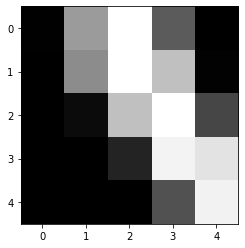

In [14]:
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray')

In [15]:
from torch.utils.data import random_split
train_ds, valid_ds = random_split(dataset, [50000,10000])
len(train_ds), len(valid_ds)

(50000, 10000)

In [16]:
from torch.utils.data import DataLoader
b_size = 128
train_loader = DataLoader(train_ds, batch_size = b_size, shuffle=True)
val_loader = DataLoader(valid_ds, b_size)

In [17]:
list(train_loader)[0]

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         ...,
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ..

In [18]:
import torch.nn as nn
input_size=28*28
num_classes=10
model = nn.Linear(input_size, num_classes)

In [19]:
model.parameters

<bound method Module.parameters of Linear(in_features=784, out_features=10, bias=True)>

In [20]:
print(model.weight.shape)

torch.Size([10, 784])


In [53]:
class MNISTmodel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size, num_classes)
  
  def forward(self, xb):
    xb = xb.reshape(-1, 784)
    out = self.linear(xb)
    return out
  
  def training_step(self, batch):
    images, labels = batch
    preds = self(images)
    loss = F.cross_entropy(preds, labels)
    return loss

  def validation_step(self, batch):
    images, labels = batch
    preds = self(images)
    loss = F.cross_entropy(preds, labels)
    acc = accuracy(preds, labels)
    return {"val.loss": loss, "accuracy": acc}

  def validation_final(self, outputs):
    batch_losses = [x['val.loss'] for x in outputs]
    epoch_loss = torch.stack(batch_losses).mean()
    batch_accs = [x['accuracy'] for x in outputs]
    epoch_accuracy = torch.stack(batch_accs).mean()
    return {"val.loss": epoch_loss, "accuracy": epoch_accuracy}

  def epoch_end(self, epoch, result):
    print("epoch number {:4f}: average validation loss = {:.4f};\
     average validation accuracy: {:.4f}".format(epoch, result["val.loss"], result["accuracy"]))

In [54]:
model = MNISTmodel()

In [25]:
model.parameters

<bound method Module.parameters of MNISTmodel(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)>

In [26]:
print(model.linear.weight.shape, model.linear.bias.shape)

torch.Size([10, 784]) torch.Size([10])


In [28]:
for images, labels in train_loader:
  print(images.shape)
  outputs = model(images)
  break

print(outputs.shape)
print("sample outputs: ", outputs[:3].data)

torch.Size([128, 1, 28, 28])
torch.Size([128, 10])
sample outputs:  tensor([[ 0.0184, -0.1610, -0.1197,  0.2812, -0.0611, -0.0606,  0.2109,  0.1389,
         -0.2155,  0.1563],
        [ 0.0749, -0.1465, -0.2950,  0.2557,  0.2467,  0.1146,  0.3616, -0.1455,
          0.0663,  0.0332],
        [-0.0475, -0.0683, -0.0870,  0.2728,  0.1798,  0.0382,  0.0229,  0.1924,
          0.0198,  0.1185]])


In [29]:
import torch.nn.functional as F

In [30]:
model

MNISTmodel(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

In [31]:
probs = F.softmax(outputs, dim=1)

In [32]:
print(probs )

tensor([[0.0987, 0.0825, 0.0859,  ..., 0.1113, 0.0781, 0.1133],
        [0.1000, 0.0801, 0.0691,  ..., 0.0802, 0.0991, 0.0959],
        [0.0888, 0.0870, 0.0854,  ..., 0.1129, 0.0950, 0.1049],
        ...,
        [0.0964, 0.0910, 0.0967,  ..., 0.1029, 0.0761, 0.0915],
        [0.1301, 0.1137, 0.0677,  ..., 0.0862, 0.0952, 0.0702],
        [0.1239, 0.1257, 0.0831,  ..., 0.0784, 0.0738, 0.0855]],
       grad_fn=<SoftmaxBackward0>)


In [33]:
print(probs[:3].data)

tensor([[0.0987, 0.0825, 0.0859, 0.1283, 0.0911, 0.0912, 0.1196, 0.1113, 0.0781,
         0.1133],
        [0.1000, 0.0801, 0.0691, 0.1198, 0.1187, 0.1040, 0.1332, 0.0802, 0.0991,
         0.0959],
        [0.0888, 0.0870, 0.0854, 0.1224, 0.1115, 0.0968, 0.0953, 0.1129, 0.0950,
         0.1049]])


In [34]:
max_probs, out_decision = torch.max(probs, dim=1)

In [35]:
out_decision

tensor([3, 6, 3, 3, 3, 3, 6, 3, 6, 0, 3, 3, 6, 4, 3, 3, 3, 3, 3, 6, 3, 6, 3, 0,
        4, 3, 3, 3, 0, 2, 3, 3, 1, 3, 4, 3, 3, 3, 6, 3, 0, 3, 3, 3, 3, 0, 3, 6,
        9, 3, 8, 3, 3, 6, 0, 3, 3, 1, 3, 3, 3, 6, 4, 4, 3, 3, 3, 1, 3, 3, 1, 3,
        3, 4, 3, 3, 3, 3, 3, 3, 0, 3, 3, 6, 1, 1, 6, 6, 3, 6, 9, 3, 3, 3, 4, 3,
        3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 1, 3, 0, 3, 3, 3, 1, 6, 9, 3, 6, 3, 0,
        3, 0, 3, 3, 1, 3, 0, 1])

In [49]:
def accuracy(outputs, labels):
  _,preds= torch.max(outputs, dim=1)
  return torch.tensor(torch.sum(preds==labels).item()/len(labels))

In [37]:
accuracy(probs, labels)

tensor(0.1094)

In [42]:
torch.sum(out_decision==labels)

tensor(14)

In [39]:
loss_fn = F.cross_entropy

In [40]:
loss=loss_fn(input=outputs,target=labels)
print(loss)

tensor(2.3350, grad_fn=<NllLossBackward0>)


*Trainnig the model*

In [43]:
def evaluate(model, val_loader):
  outputs = [model.validation_step(batch) for batch in val_loader]
  final_eval = model.validation_final(outputs)
  return final_eval


def fit(model, nb_epoch, train_loader, val_loader, lr, opt_func=torch.optim.SGD):
  history=[]
  opt = opt_func(model.parameters(), lr=lr)
  for epoch in range(nb_epoch):
    
    for batch in train_loader:
      loss = model.training_step(batch)
      loss.backward()
      opt.step()
      opt.zero_grad()
    epoch_eval = evaluate(model, val_loader)
    model.epoch_end(epoch, epoch_eval)
    history.append(epoch_eval)
  return history

In [ ]:
history = fit(model,50, train_loader, val_loader, lr=1e-3)

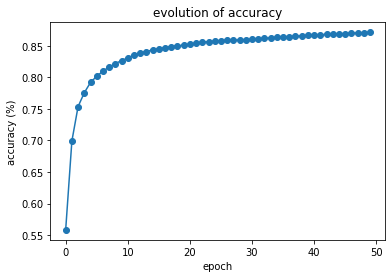

In [63]:
historyplot = [x['accuracy'] for x in history]
plt.plot(historyplot, '-o')
plt.xlabel('epoch')
plt.title("evolution of accuracy")
plt.ylabel("accuracy (%)")
plt.show()

In [64]:
# test data set
test_ds = MNIST(root='data/', train=False, transform= transforms.ToTensor())

In [65]:
img, label = test_ds[0]

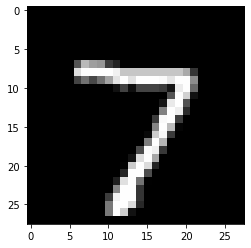

In [73]:
plt.imshow(img[0], cmap='gray')

In [78]:
img.shape

torch.Size([1, 28, 28])

In [91]:
def predict_image(model, image):
  xb = image.unsqueeze(0)
  yb = model(xb)
  _, preds_lab = torch.max(yb, dim=1)
  return(preds_lab.item())

In [92]:
predict_image(model, img)

7

label 2 prediction 8


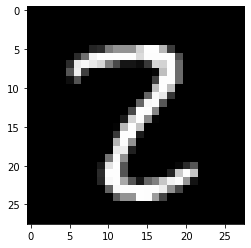

In [98]:
img, label = test_ds[1839]
plt.imshow(img[0], cmap='gray')
print("label", label, "prediction", predict_image(model, img))

In [99]:
test_loader = DataLoader(test_ds, batch_size=256)
result = evaluate(model, test_loader)
print(result)

{'val.loss': tensor(0.4677, grad_fn=<MeanBackward0>), 'accuracy': tensor(0.8845)}


In [102]:
torch.save(model.state_dict(), "mnist_logistic.pth")

In [101]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0170,  0.0200, -0.0321,  ...,  0.0206,  0.0115, -0.0127],
                      [-0.0328, -0.0242,  0.0313,  ..., -0.0024, -0.0125,  0.0262],
                      [-0.0010, -0.0006,  0.0316,  ...,  0.0269,  0.0102, -0.0313],
                      ...,
                      [ 0.0052, -0.0187, -0.0356,  ..., -0.0117, -0.0045,  0.0056],
                      [ 0.0262,  0.0248,  0.0335,  ..., -0.0030, -0.0241, -0.0036],
                      [-0.0333,  0.0044,  0.0136,  ...,  0.0135, -0.0123,  0.0218]])),
             ('linear.bias',
              tensor([-0.0777,  0.1324, -0.0238, -0.0324,  0.0528,  0.1344, -0.0079,  0.0682,
                      -0.1759, -0.0067]))])

In [105]:
model2 = MNISTmodel()
model2.load_state_dict(torch.load("mnist_logistic.pth"))
list(model2.parameters())

[Parameter containing:
 tensor([[-0.0170,  0.0200, -0.0321,  ...,  0.0206,  0.0115, -0.0127],
         [-0.0328, -0.0242,  0.0313,  ..., -0.0024, -0.0125,  0.0262],
         [-0.0010, -0.0006,  0.0316,  ...,  0.0269,  0.0102, -0.0313],
         ...,
         [ 0.0052, -0.0187, -0.0356,  ..., -0.0117, -0.0045,  0.0056],
         [ 0.0262,  0.0248,  0.0335,  ..., -0.0030, -0.0241, -0.0036],
         [-0.0333,  0.0044,  0.0136,  ...,  0.0135, -0.0123,  0.0218]],
        requires_grad=True), Parameter containing:
 tensor([-0.0777,  0.1324, -0.0238, -0.0324,  0.0528,  0.1344, -0.0079,  0.0682,
         -0.1759, -0.0067], requires_grad=True)]

In [106]:
test_loader = DataLoader(test_ds, batch_size=128)
result = evaluate(model2, test_loader)
print(result)

{'val.loss': tensor(0.4694, grad_fn=<MeanBackward0>), 'accuracy': tensor(0.8854)}
